<h1 style = "color: skyblue">Fish Market Dataset | ML Linear Regression</h1>

<p>This dataset is a record of 7 common different fish species in fish market sales. </p>
<p>With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.</p>

In [2]:
# import dataset with OpenML, pandas and numpy modules
from sklearn.datasets import fetch_openml
import numpy as np 
import pandas as pd 
fish_market = fetch_openml('Fish-market', version = 1) # as a dictionary

/home/marius/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# save it locally as numpy array
np.save('./dataset/fish_market.npy', fish_market)

In [4]:
# load the data
fish_market = np.load('./dataset/fish_market.npy', allow_pickle = 'TRUE').item()

# show the keys
print(fish_market.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [5]:
# assign the data dictionary to DataFrame
fishMarket = pd.DataFrame(fish_market['data'])
fishMarket

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


In [6]:
# Analyze the data

fishMarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [7]:
# NaN values False
fishMarket.isna().sum(axis = 0)

Species    0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
# summary of the numerical attributes
fishMarket.describe()

,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,26.247170,28.415723,31.227044,8.970994,4.417486
std,9.996441,10.716328,11.610246,4.286208,1.685804
min,7.500000,8.400000,8.800000,1.728400,1.047600
25%,19.050000,21.000000,23.150000,5.944800,3.385650
50%,25.200000,27.300000,29.400000,7.786000,4.248500
75%,32.700000,35.500000,39.650000,12.365900,5.584500
max,59.000000,63.400000,68.000000,18.957000,8.142000


array([[<Axes: title={'center': 'Length1'}>,
        <Axes: title={'center': 'Length2'}>],
       [<Axes: title={'center': 'Length3'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Width'}>, <Axes: >]], dtype=object)

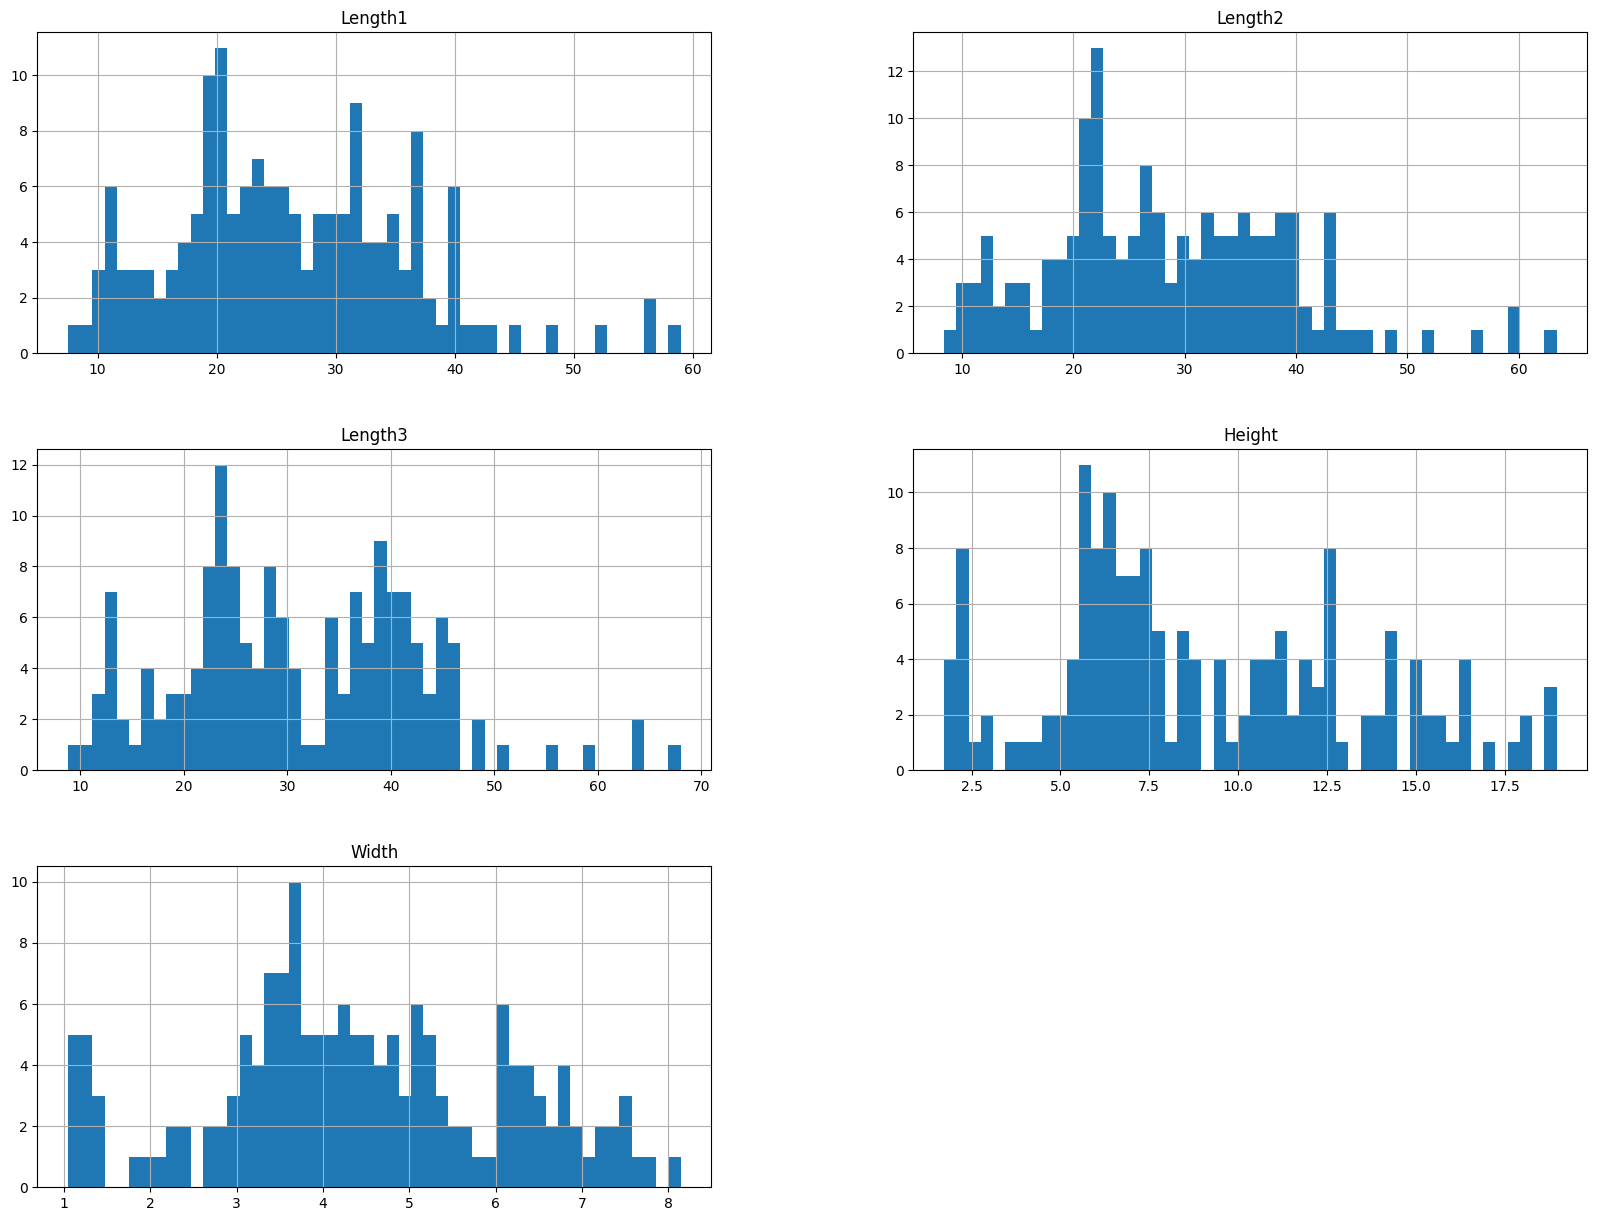

In [9]:
# plot histograms for numerical attributes
import matplotlib.pyplot as plt 

fishMarket.hist(bins = 50, figsize = (20, 15))

In [10]:
# types of fishes
fishMarket['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [11]:
# Create train and test sets

from sklearn.model_selection import train_test_split
trainSet, testSet = train_test_split(fishMarket, test_size = 0.2, random_state = 42)

# train set 80%
trainSet

,Species,Length1,Length2,Length3,Height,Width
75,Perch,15.0,16.2,17.2,4.5924,2.6316
138,Pike,43.2,46.0,48.7,7.7920,4.8700
2,Bream,23.9,26.5,31.1,12.3778,4.6961
86,Perch,20.0,22.0,23.5,6.1100,3.4075
45,Roach,20.5,22.5,25.3,7.0334,3.8203
...,...,...,...,...,...,...
71,Parkki,24.0,26.0,29.0,11.3680,4.2340
106,Perch,25.9,28.0,29.4,7.8204,4.2042
14,Bream,29.4,32.0,37.2,14.9544,5.1708
92,Perch,20.5,22.5,24.0,6.7920,3.6240


In [12]:
# test set 20%
testSet

,Species,Length1,Length2,Length3,Height,Width
78,Perch,16.8,18.7,19.4,5.1992,3.1234
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
128,Pike,30.0,32.3,34.8,5.5680,3.3756
55,Whitefish,23.6,26.0,28.7,8.3804,4.2476
94,Perch,21.0,23.0,24.5,5.2185,3.6260
29,Bream,33.5,37.0,42.6,18.9570,6.6030
147,Smelt,10.1,10.6,11.6,1.7284,1.1484
51,Roach,23.6,25.2,27.9,7.0866,3.9060
98,Perch,22.6,24.6,26.2,6.7334,4.1658
141,Pike,52.0,56.0,59.7,10.6863,6.9849


In [13]:
# Prepare for Correlations between features
fishMarket.dtypes

Species     object
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [14]:
# let's drop the string (object) feature
fishMarketCopy = fishMarket.copy()
fishMarketCopy.drop({'Species'}, axis = 1, inplace = True)
fishMarketCopy.sample(8)

,Length1,Length2,Length3,Height,Width
3,26.3,29.0,33.5,12.7300,4.4555
40,19.0,20.5,22.8,6.4752,3.3516
81,18.2,20.0,21.0,5.0820,2.7720
80,17.8,19.6,20.8,5.1376,3.0368
32,36.2,39.5,45.3,18.7542,6.7497
141,52.0,56.0,59.7,10.6863,6.9849
19,31.0,33.5,38.7,14.4738,5.7276
96,22.0,24.0,25.5,7.2930,3.7230


In [15]:
# Correlations between features
corrMatrix = fishMarketCopy.corr()
print(corrMatrix)

          Length1   Length2   Length3    Height     Width
Length1  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.867050  0.873547  0.878520  0.792881  1.000000


array([[<Axes: xlabel='Length1', ylabel='Length1'>,
        <Axes: xlabel='Length2', ylabel='Length1'>,
        <Axes: xlabel='Length3', ylabel='Length1'>,
        <Axes: xlabel='Height', ylabel='Length1'>,
        <Axes: xlabel='Width', ylabel='Length1'>],
       [<Axes: xlabel='Length1', ylabel='Length2'>,
        <Axes: xlabel='Length2', ylabel='Length2'>,
        <Axes: xlabel='Length3', ylabel='Length2'>,
        <Axes: xlabel='Height', ylabel='Length2'>,
        <Axes: xlabel='Width', ylabel='Length2'>],
       [<Axes: xlabel='Length1', ylabel='Length3'>,
        <Axes: xlabel='Length2', ylabel='Length3'>,
        <Axes: xlabel='Length3', ylabel='Length3'>,
        <Axes: xlabel='Height', ylabel='Length3'>,
        <Axes: xlabel='Width', ylabel='Length3'>],
       [<Axes: xlabel='Length1', ylabel='Height'>,
        <Axes: xlabel='Length2', ylabel='Height'>,
        <Axes: xlabel='Length3', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='

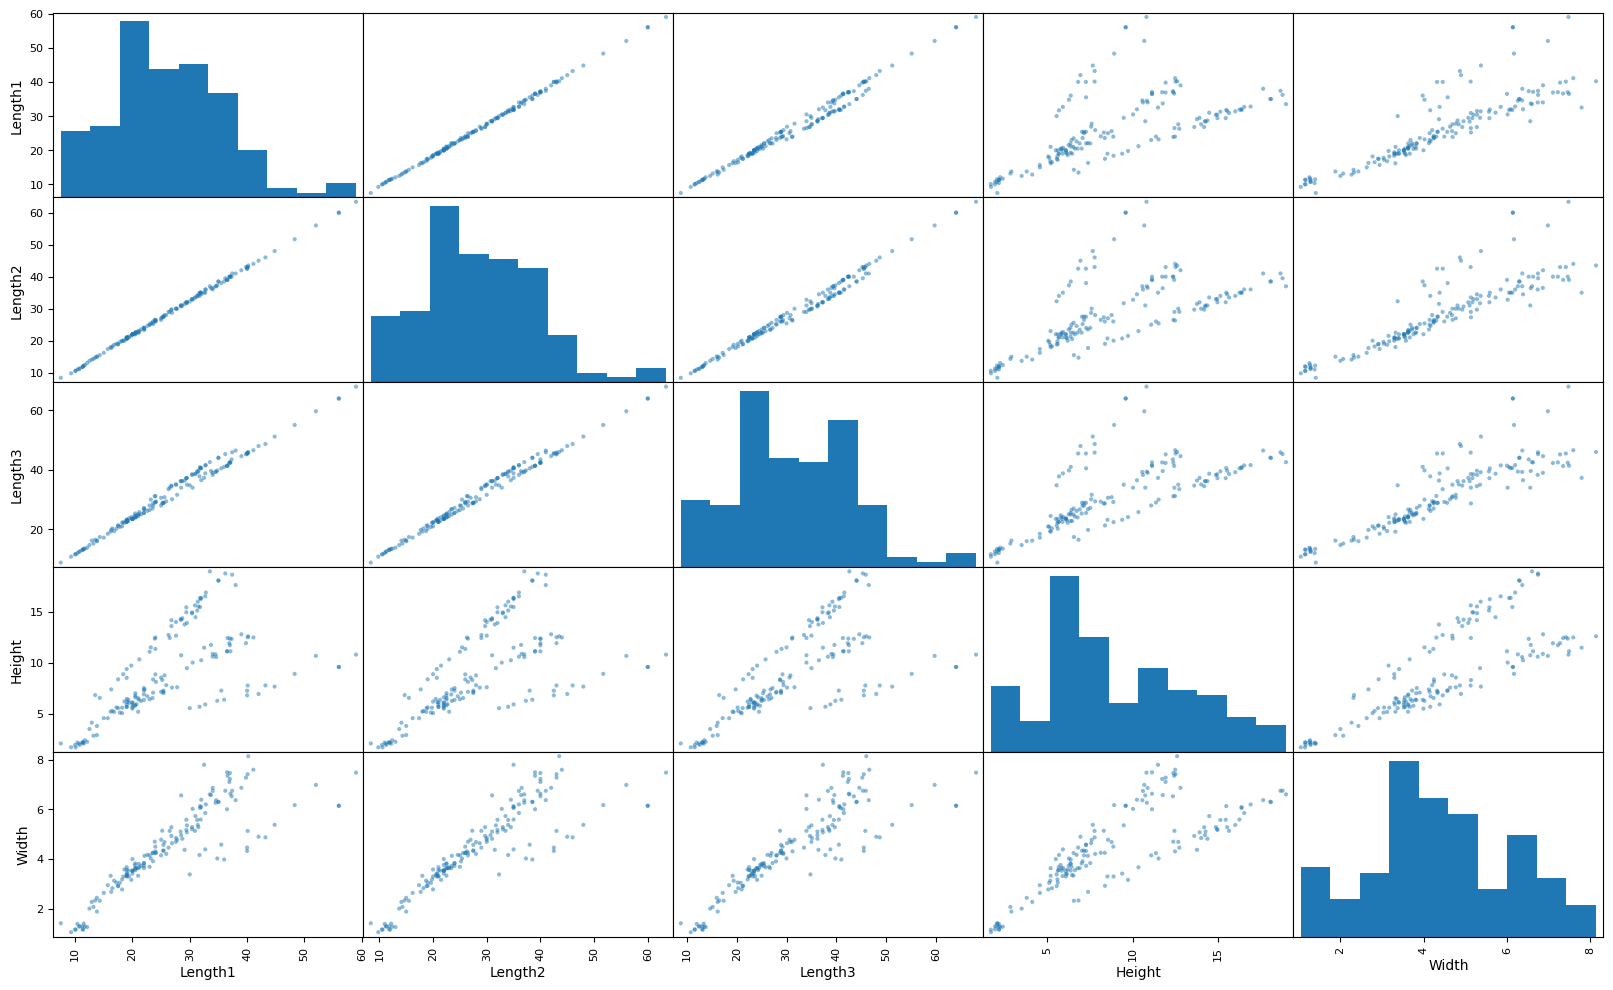

In [16]:
# Show correlations as scatter plots

from pandas.plotting import scatter_matrix

features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
scatter_matrix(fishMarket[features], figsize = (20, 12))


<Axes: xlabel='Length1', ylabel='Length2'>

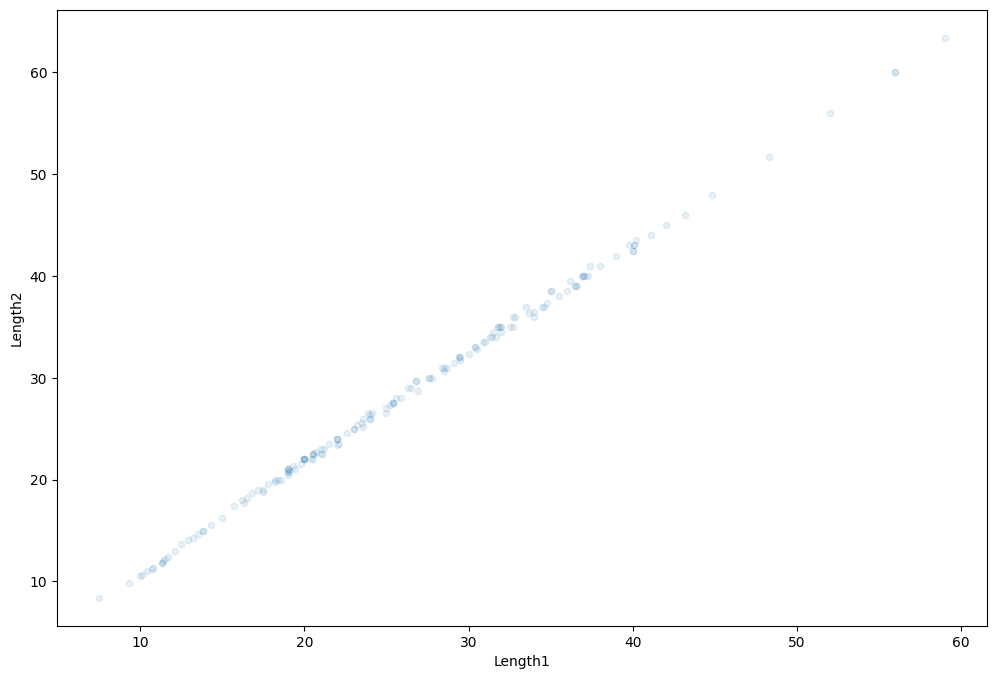

In [17]:
# the most correlated features

fishMarket.plot(kind = 'scatter', x = 'Length1', y = 'Length2', alpha = 0.1, figsize = (12, 8))

In [18]:
# Prepare Data for ML ALgorithms

# Convert the "Species" feature of string type to a dummy variable

# One Hot Enconding

fishMarketCat = fishMarket[["Species"]]

print(fishMarketCat.sample(10))

    Species
66   Parkki
32    Bream
108   Perch
101   Perch
132    Pike
2     Bream
152   Smelt
22    Bream
118   Perch
1     Bream


In [19]:
print(fishMarketCat.shape) # 159 rows and one column

(159, 1)


In [20]:
# Create dummy features for the text column

from sklearn.preprocessing import OneHotEncoder

catEncoder = OneHotEncoder()

# One Hot Sparse Matrix -> prints the locations of ones (row, position of 1)
fishMarketCat1Hot = catEncoder.fit_transform(fishMarketCat)
print(fishMarketCat1Hot[25:40, :]) 

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 4)	1.0
  (11, 4)	1.0
  (12, 4)	1.0
  (13, 4)	1.0
  (14, 4)	1.0


In [21]:
# convert the sparse matrix to a normal array
print(fishMarketCat1Hot.toarray()[25:40])

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


In [22]:
# encoded categories
print(catEncoder.categories_)

[array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)]


In [23]:
# creating a NumPy array instead of a DataFrame (without Species column, only numerical features)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer() 
fishMarketNum = fishMarket.drop("Species", axis = 1)
imputer.fit(fishMarketNum)

# separate features
X = imputer.transform(fishMarketNum)

print(X[10:20]) # Lenght1, Lenght2, Lenght3, Height & Width

[[28.4    31.     36.2    14.2628  5.1042]
 [28.7    31.     36.2    14.3714  4.8146]
 [29.1    31.5    36.4    13.7592  4.368 ]
 [29.5    32.     37.3    13.9129  5.0728]
 [29.4    32.     37.2    14.9544  5.1708]
 [29.4    32.     37.2    15.438   5.58  ]
 [30.4    33.     38.3    14.8604  5.2854]
 [30.4    33.     38.5    14.938   5.1975]
 [30.9    33.5    38.6    15.633   5.1338]
 [31.     33.5    38.7    14.4738  5.7276]]


In [26]:
# Training Models - Unsupervised Learning Problem
fishMarketNum

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [29]:
# Clustering Algorithms to group similar fishes based on their lengths, widhts, heights => K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
XScaled = scaler.fit_transform(X)
XScaled

array([[-3.05788578e-01, -2.82303007e-01, -1.06020232e-01,
         5.96578670e-01, -2.36528948e-01],
       [-2.25507242e-01, -1.98053663e-01, -2.33668373e-03,
         8.21260549e-01, -6.65789457e-02],
       [-2.35542409e-01, -1.79331587e-01, -1.09769794e-02,
         7.97341291e-01,  1.65793169e-01],
       [ 5.30159764e-03,  5.46943678e-02,  1.96390116e-01,
         8.79771455e-01,  2.26210031e-02],
       [ 2.53719316e-02,  5.46943678e-02,  2.39591594e-01,
         8.12834979e-01,  4.26371272e-01],
       [ 5.54774324e-02,  1.20221635e-01,  3.00073664e-01,
         1.08395111e+00,  3.03431249e-01],
       [ 5.54774324e-02,  1.20221635e-01,  2.82793073e-01,
         1.21901769e+00,  5.12357880e-01],
       [ 1.35758768e-01,  1.48304750e-01,  3.25994551e-01,
         8.65728838e-01,  1.62163285e-01],
       [ 1.35758768e-01,  1.48304750e-01,  3.34634847e-01,
         1.17815367e+00,  2.53683979e-01],
       [ 2.26075271e-01,  2.13832017e-01,  4.29678099e-01,
         1.23004114e+00

In [62]:
# determine the number of clusters
numClusters = 5

# initialize K-Means Model
kmeans = KMeans(n_clusters = numClusters, random_state = 42)

In [77]:
# train the model and add the weight to the original dataset
fishMarket['weight'] = kmeans.fit_predict(X)

fishMarket.sample(5)

/home/marius/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Species,Length1,Length2,Length3,Height,Width,weight
149,Smelt,10.7,11.2,12.4,2.0832,1.2772,2
154,Smelt,11.5,12.2,13.4,2.0904,1.3936,2
92,Perch,20.5,22.5,24.0,6.7920,3.6240,0
141,Pike,52.0,56.0,59.7,10.6863,6.9849,4
8,Bream,27.6,30.0,35.1,14.0049,4.8438,1


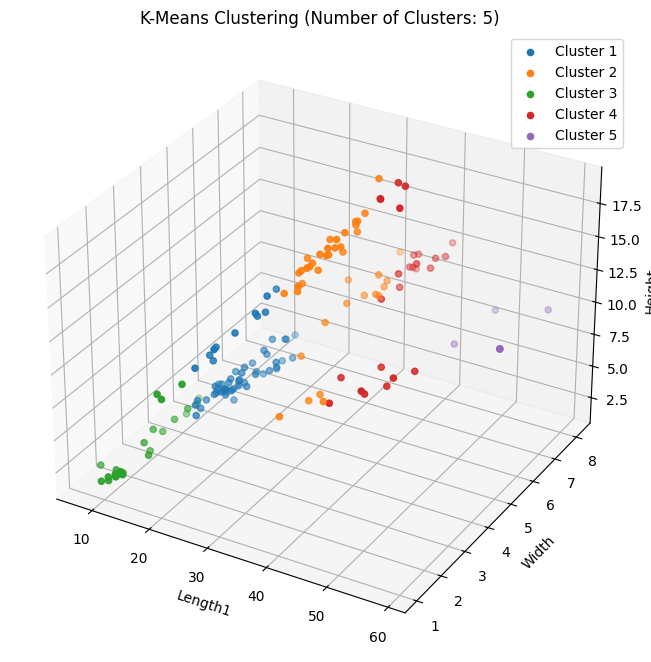

In [70]:
# plot the clusters
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(numClusters):
    cluster_points = fishMarket[fishMarket['weight'] == cluster]
    ax.scatter(cluster_points['Length1'], cluster_points['Width'],  cluster_points['Height'], label=f'Cluster {cluster + 1}')

ax.set_xlabel('Length1')
ax.set_ylabel('Width')
ax.set_zlabel('Height')
ax.set_title(f'K-Means Clustering (Number of Clusters: {numClusters})')

plt.legend()
plt.show()
plt.show()